In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, precision_score, ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/covid_dataset.csv')

In [3]:
data.head()

Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
0               Yes   Yes       Yes         Yes          Yes     No   
1               Yes   Yes       Yes         Yes           No    Yes   
2               Yes   Yes       Yes         Yes          Yes    Yes   
3               Yes   Yes       Yes          No           No    Yes   
4               Yes   Yes       Yes         Yes          Yes     No   

  Chronic Lung Disease Headache Heart Disease Diabetes  ... Fatigue   \
0                   No       No            No      Yes  ...      Yes   
1                  Yes      Yes            No       No  ...      Yes   
2                  Yes      Yes            No      Yes  ...      Yes   
3                   No       No           Yes      Yes  ...       No   
4                  Yes      Yes           Yes      Yes  ...       No   

  Gastrointestinal  Abroad travel Contact with COVID Patient  \
0               Yes            No                        Yes   
1                No            No                         No   
2               Yes           Yes                         No   
3                No           Yes                         No   
4               Yes            No                        Yes   

  Attended Large Gathering Visited Public Exposed Places  \
0                       No                           Yes   
1                      Yes                           Yes   
2                       No                            No   
3                      Yes                           Yes   
4                       No                           Yes   

  Family working in Public Exposed Places Wearing Masks  \
0                                     Yes            No   
1                                      No            No   
2                                      No            No   
3                                      No            No   
4                                      No            No   

  Sanitization from Market COVID-19  
0                       No      Yes  
1                       No      Yes  
2                       No      Yes  
3                       No      Yes  
4                       No      Yes  

[5 rows x 21 columns]

In [4]:
# Substitui os booleanos por inteiros
data = data.replace({"Yes": 1, "No": 0})

In [5]:
value = data.drop('COVID-19', axis=1)

In [6]:
label = data['COVID-19']

In [7]:
values_train, values_test, labels_train, labels_test = train_test_split(value, label, test_size=0.3, random_state=42)

In [8]:
parameters = {
    'n_estimators': range(10, 100),
    'max_features': ['sqrt', 'log2'],
    'max_depth': range(1, 20),
    'max_leaf_nodes': [3, 6, 9, 11],
    'criterion': ['gini', 'entropy', 'log_loss'],
}

In [9]:
rf = RandomForestClassifier()
random_search = RandomizedSearchCV(rf, param_distributions=parameters, cv=5)
random_search.fit(values_train, labels_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(1, 20),
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': [3, 6, 9, 11],
                                        'n_estimators': range(10, 100)})

In [10]:
best = random_search.best_estimator_

In [11]:
print(best)

RandomForestClassifier(criterion='log_loss', max_depth=18, max_leaf_nodes=11,
                       n_estimators=11)


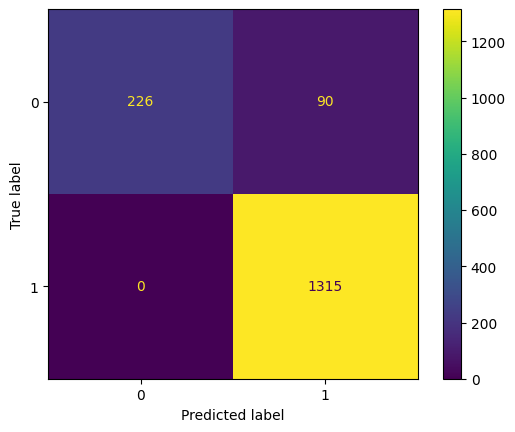

In [12]:
labels_pred = best.predict(values_test)
cm = confusion_matrix(labels_test, labels_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

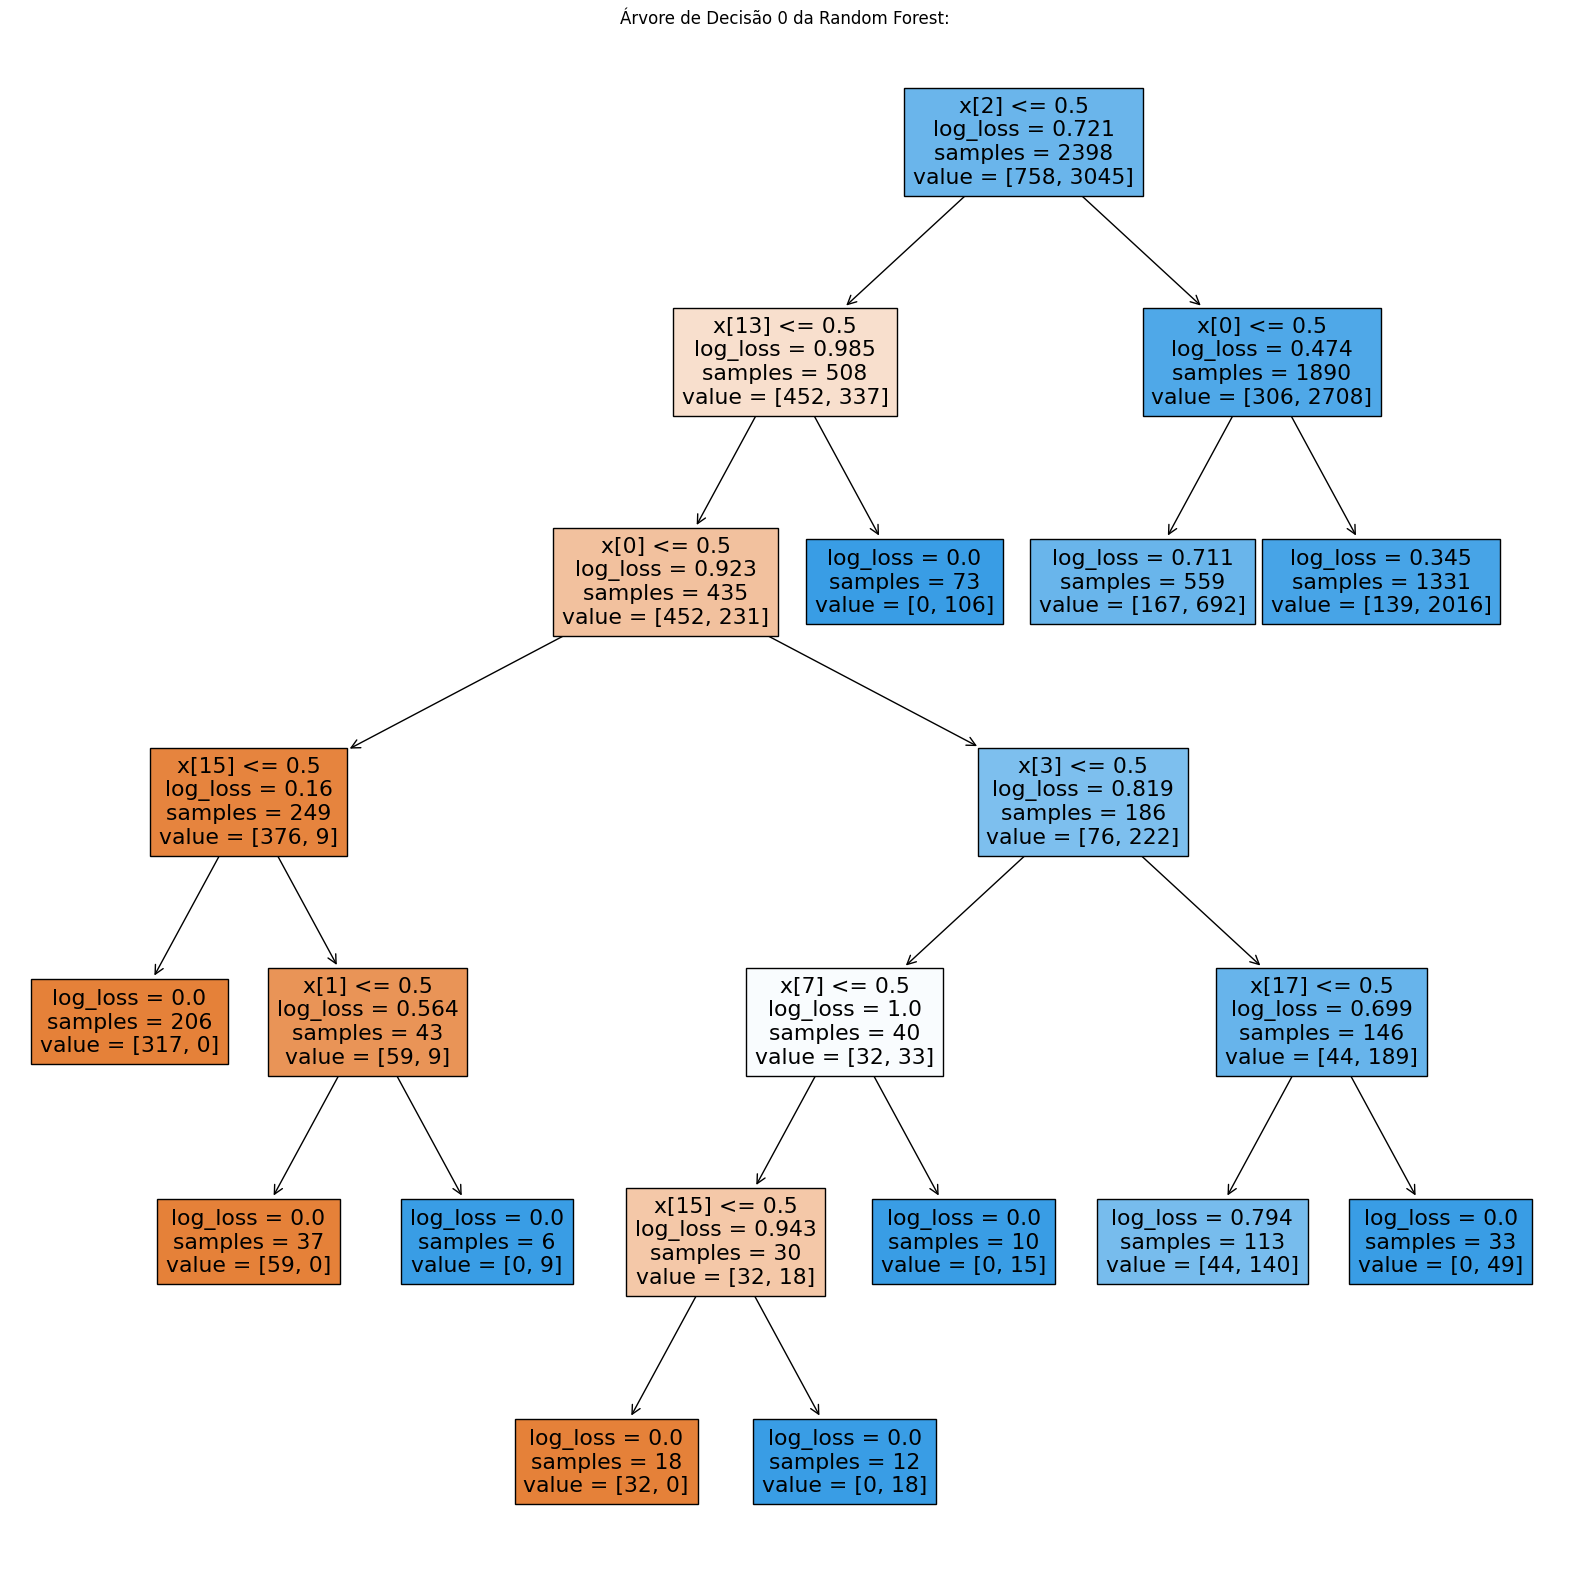

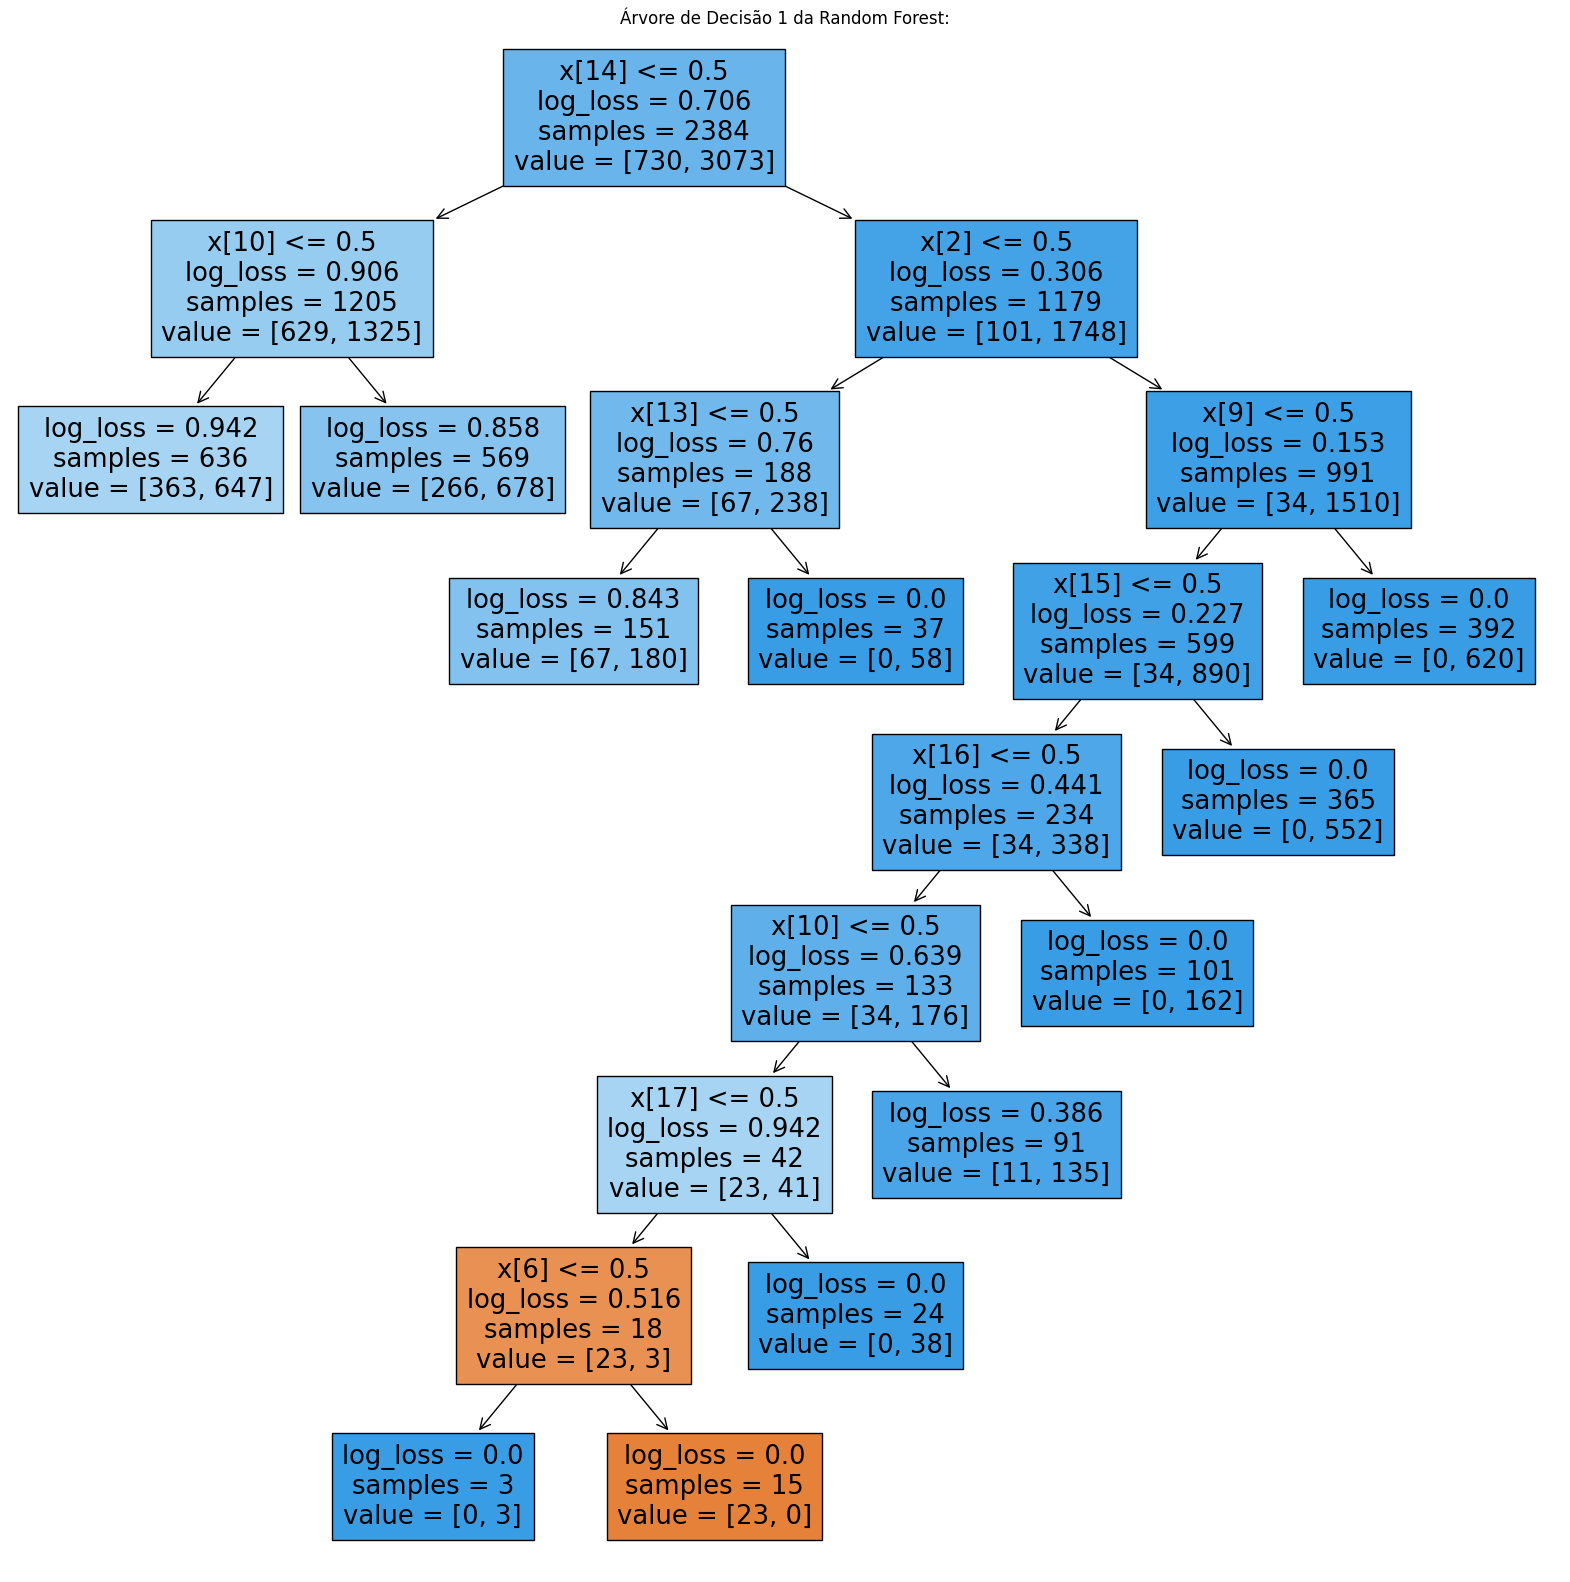

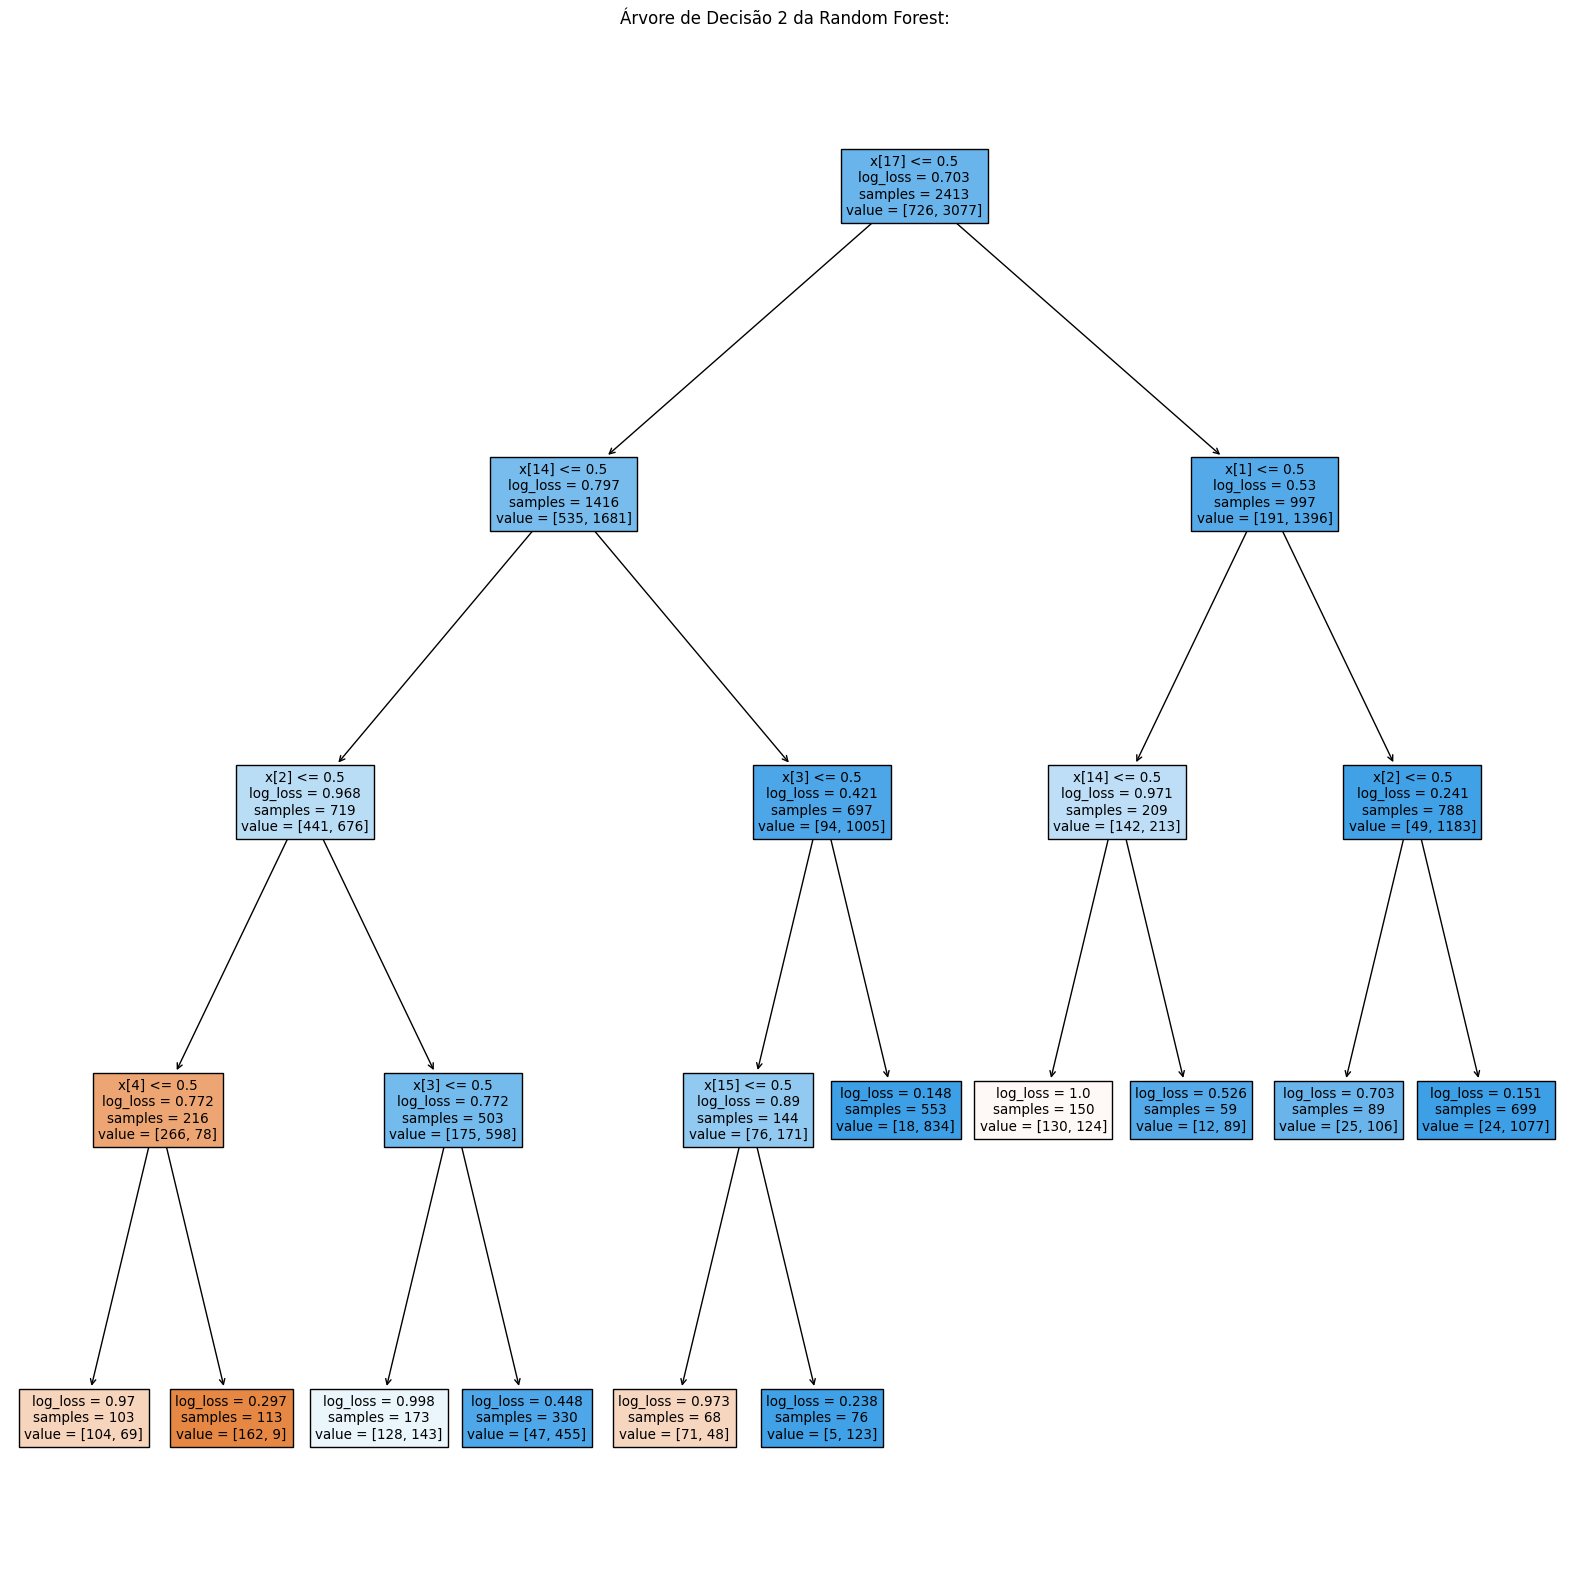

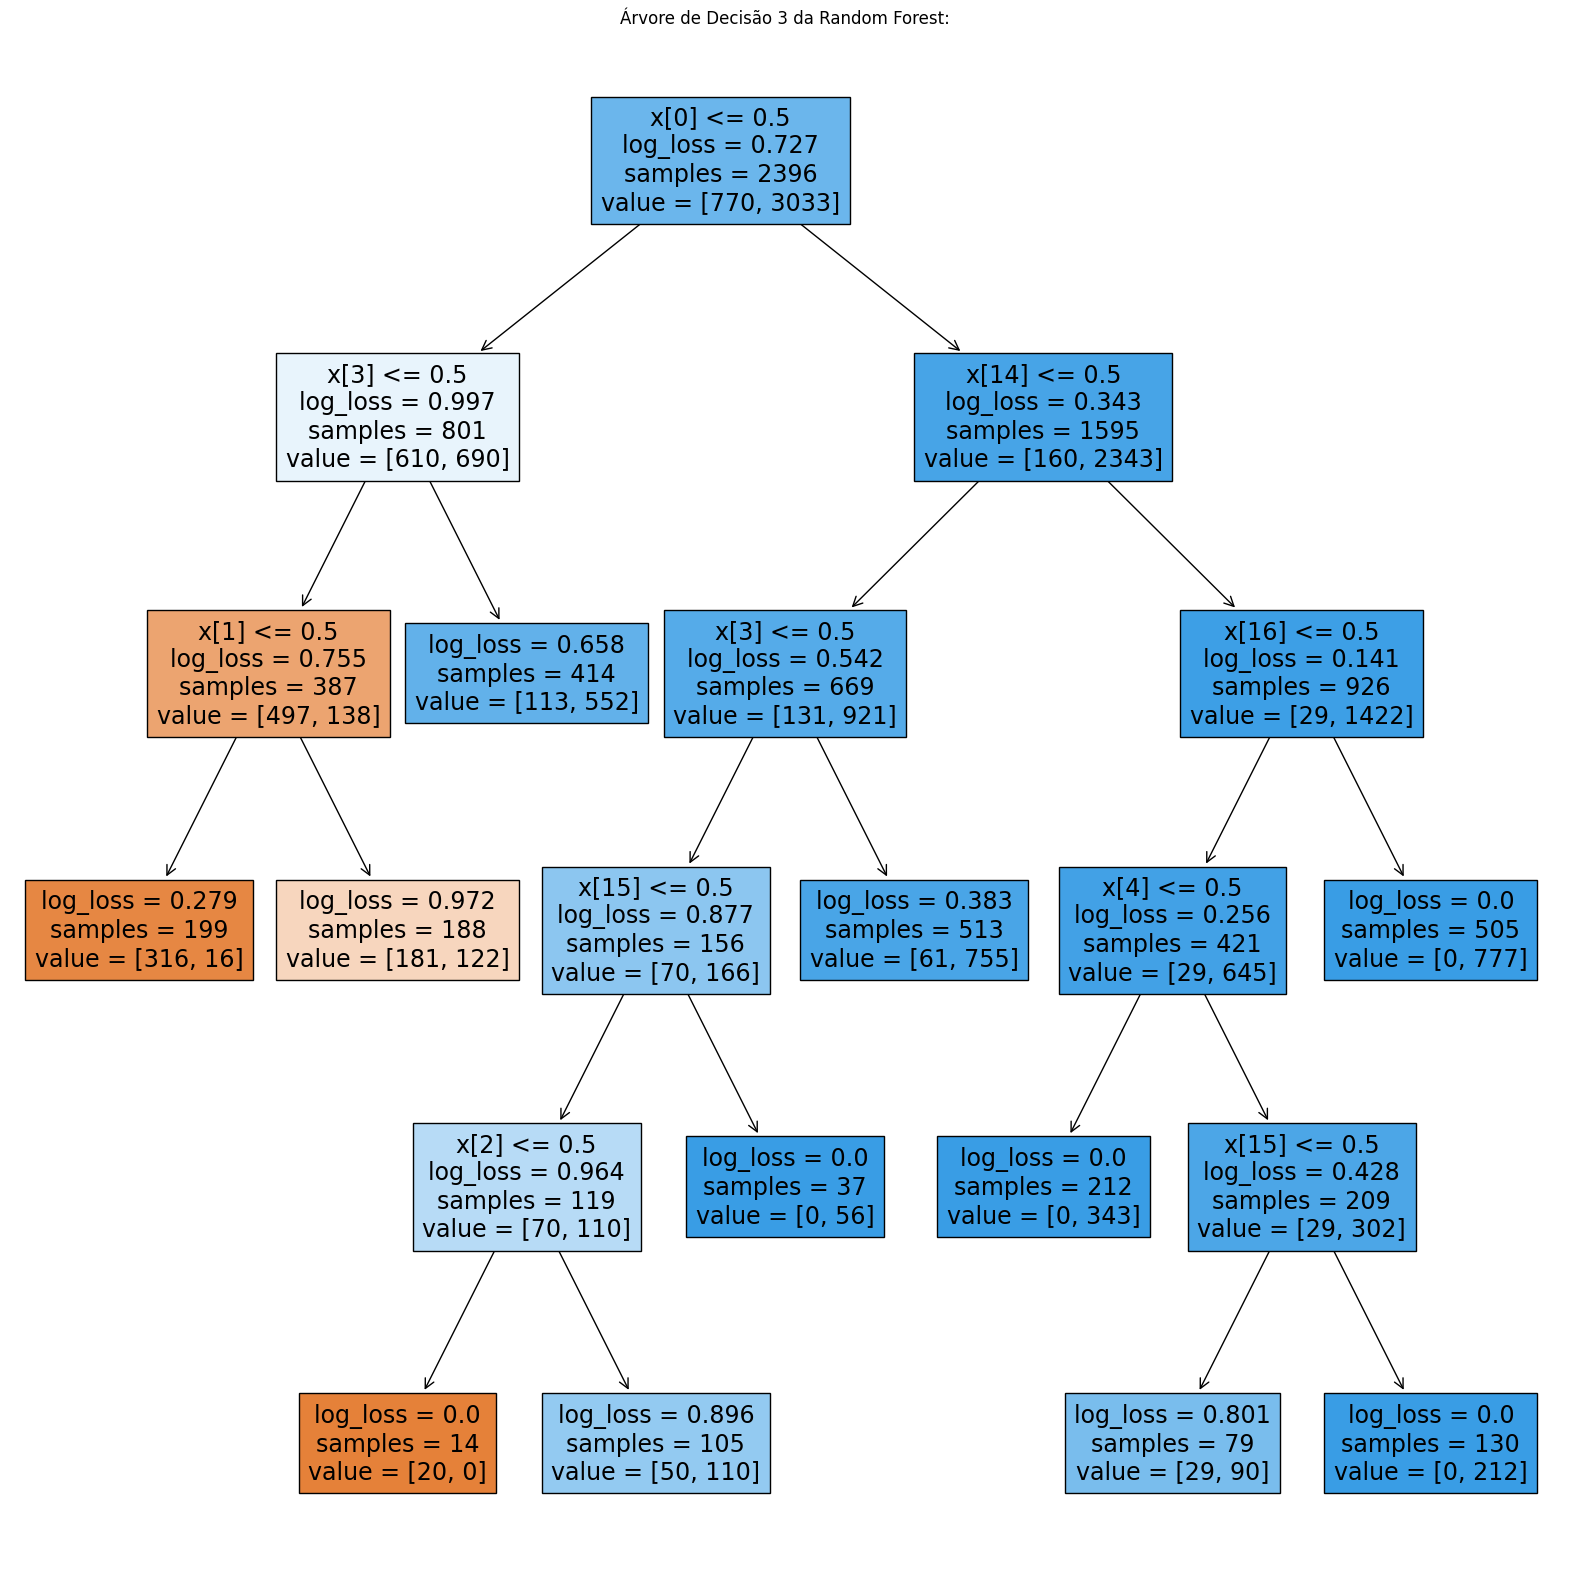

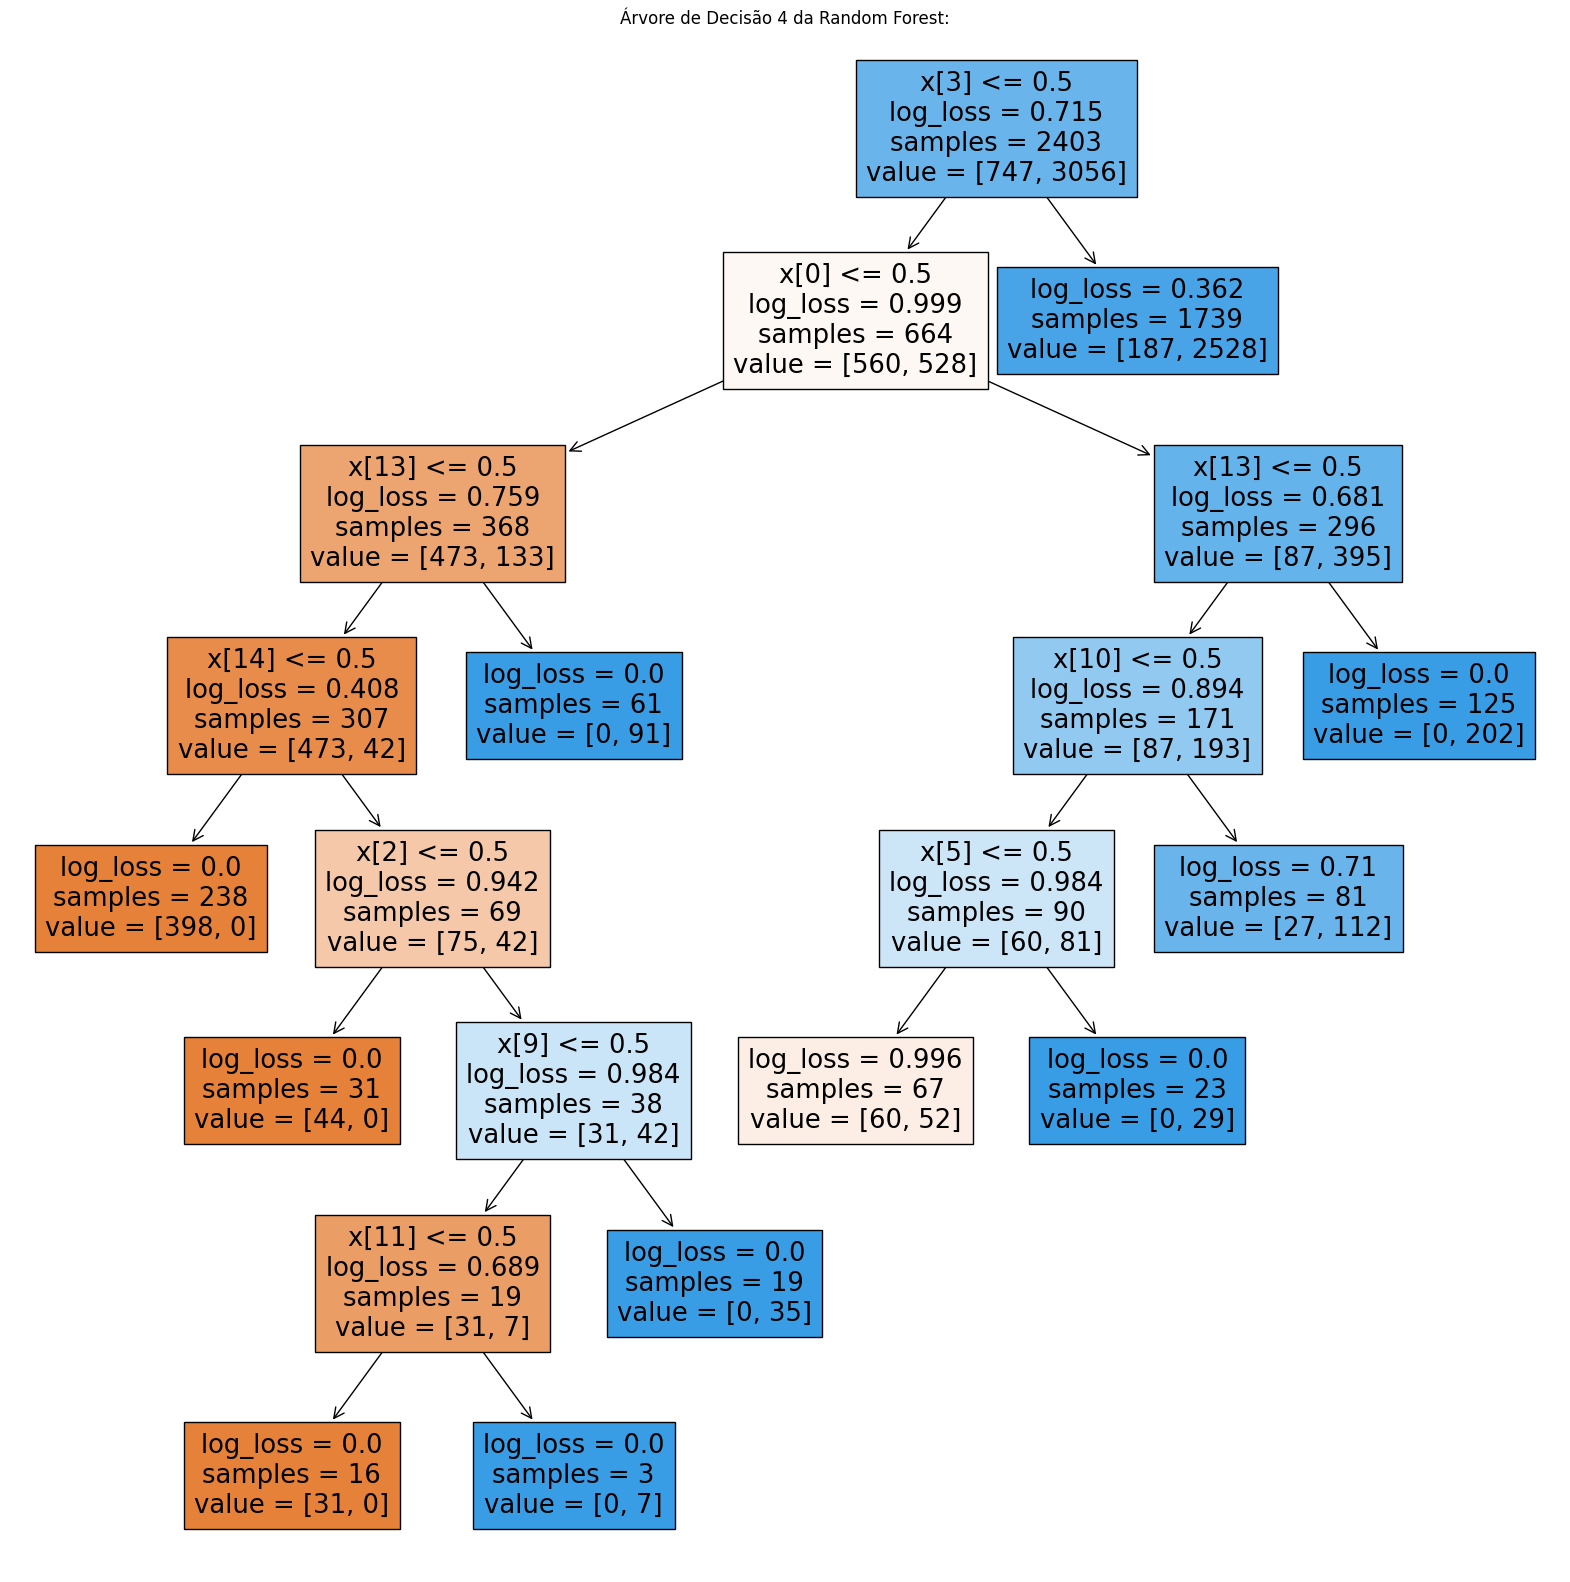

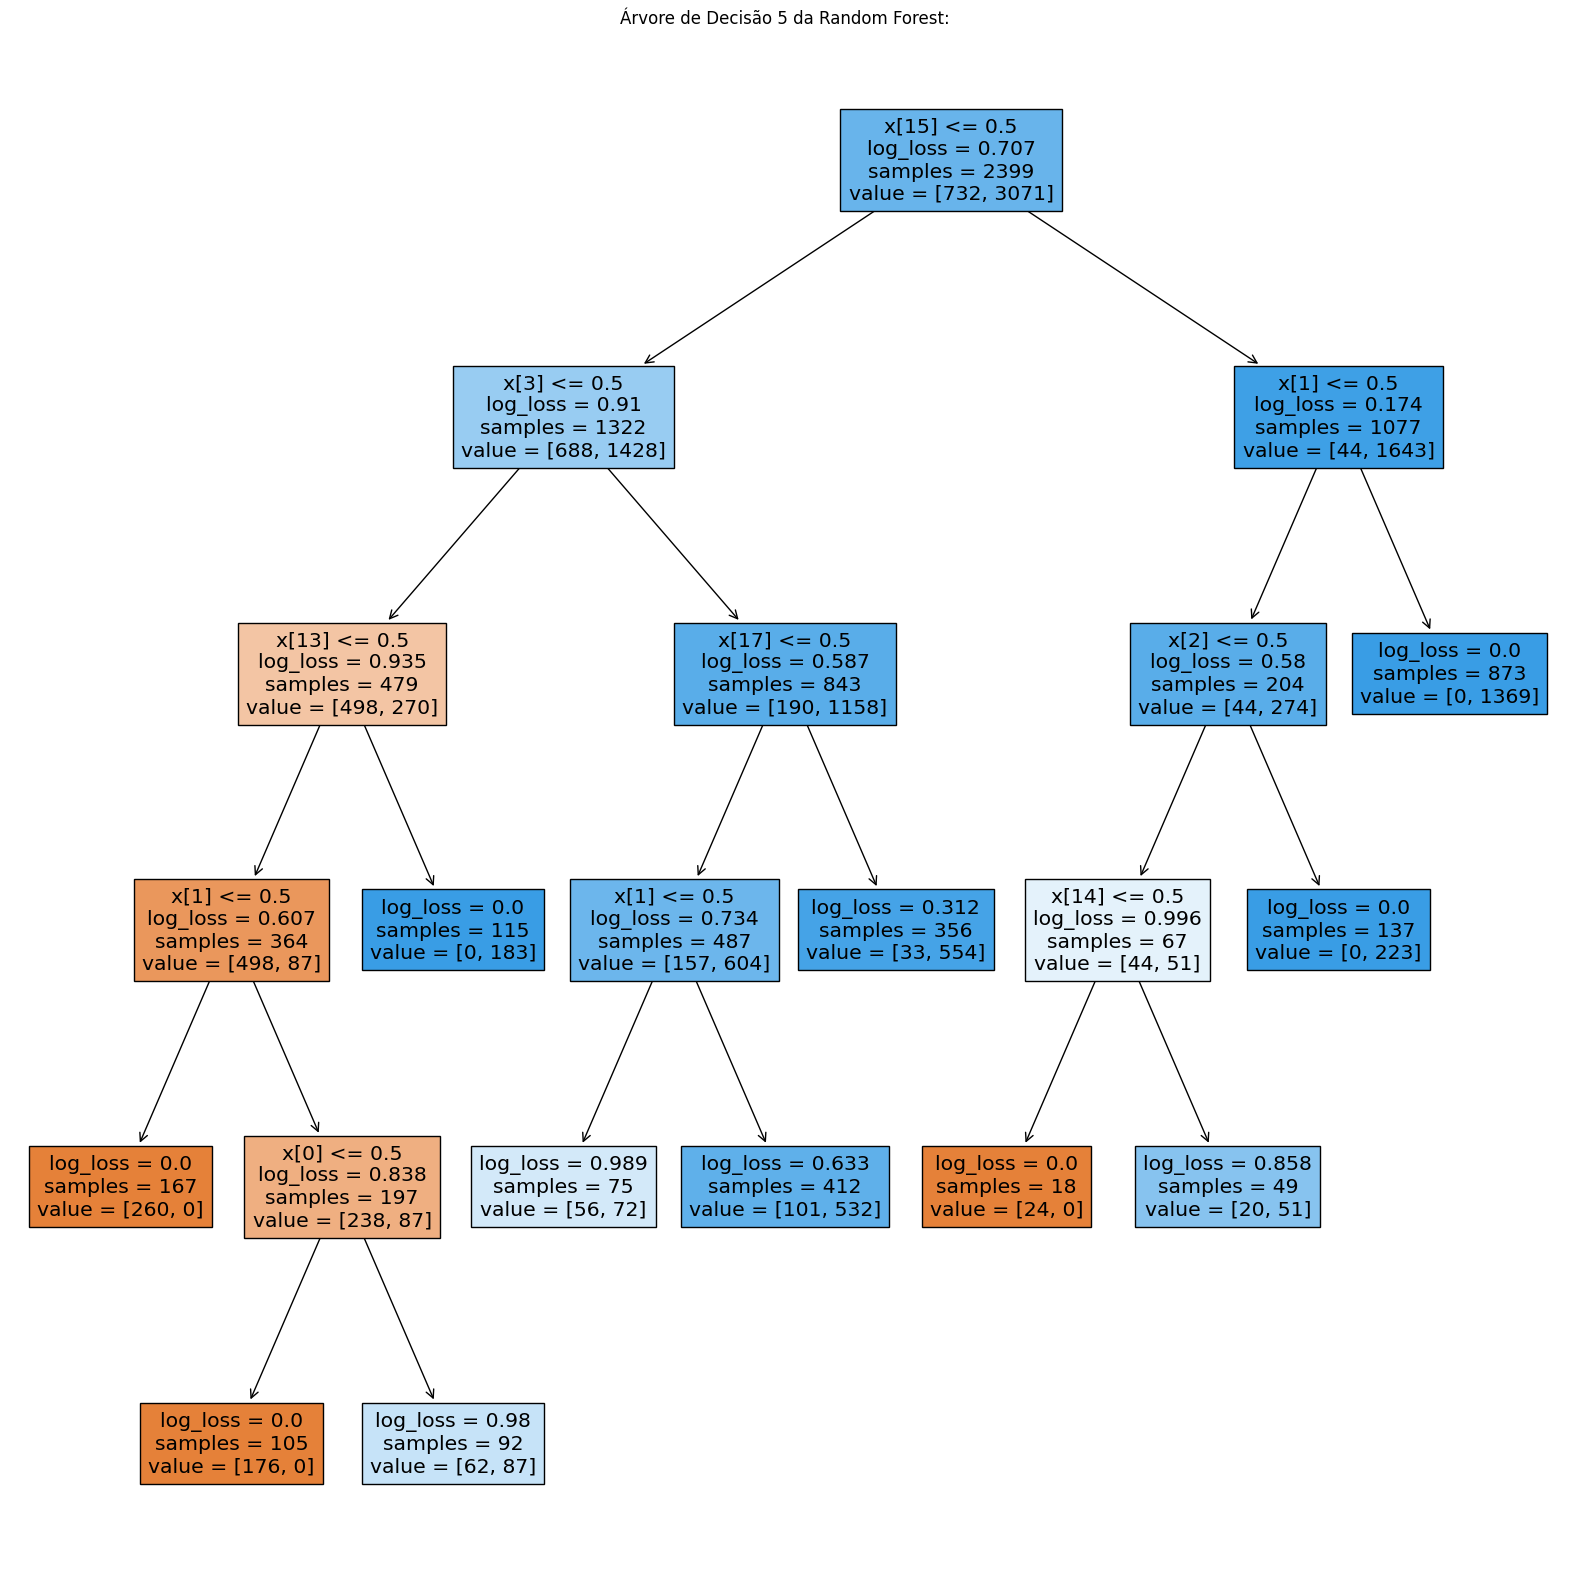

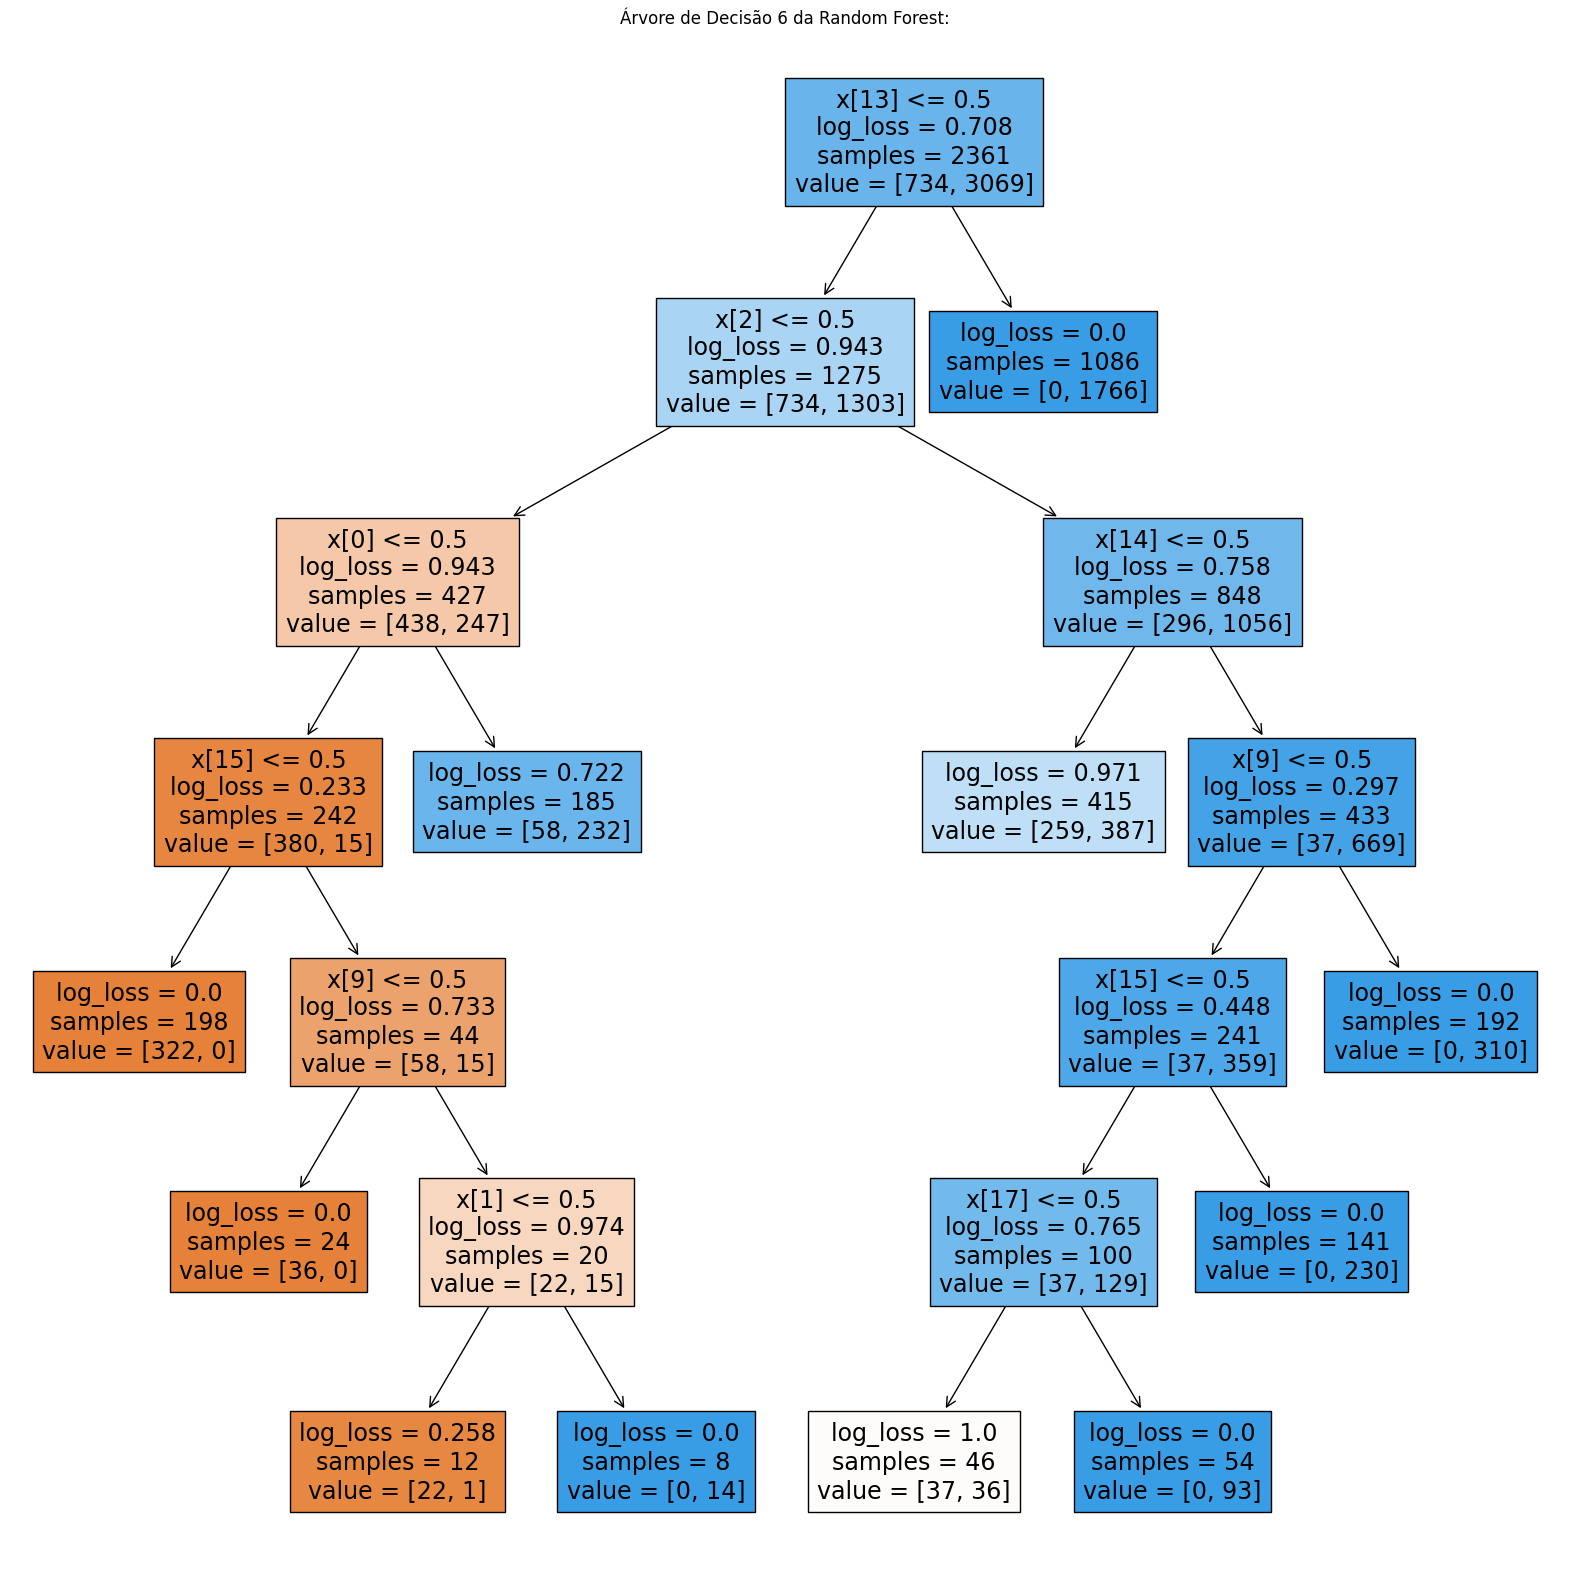

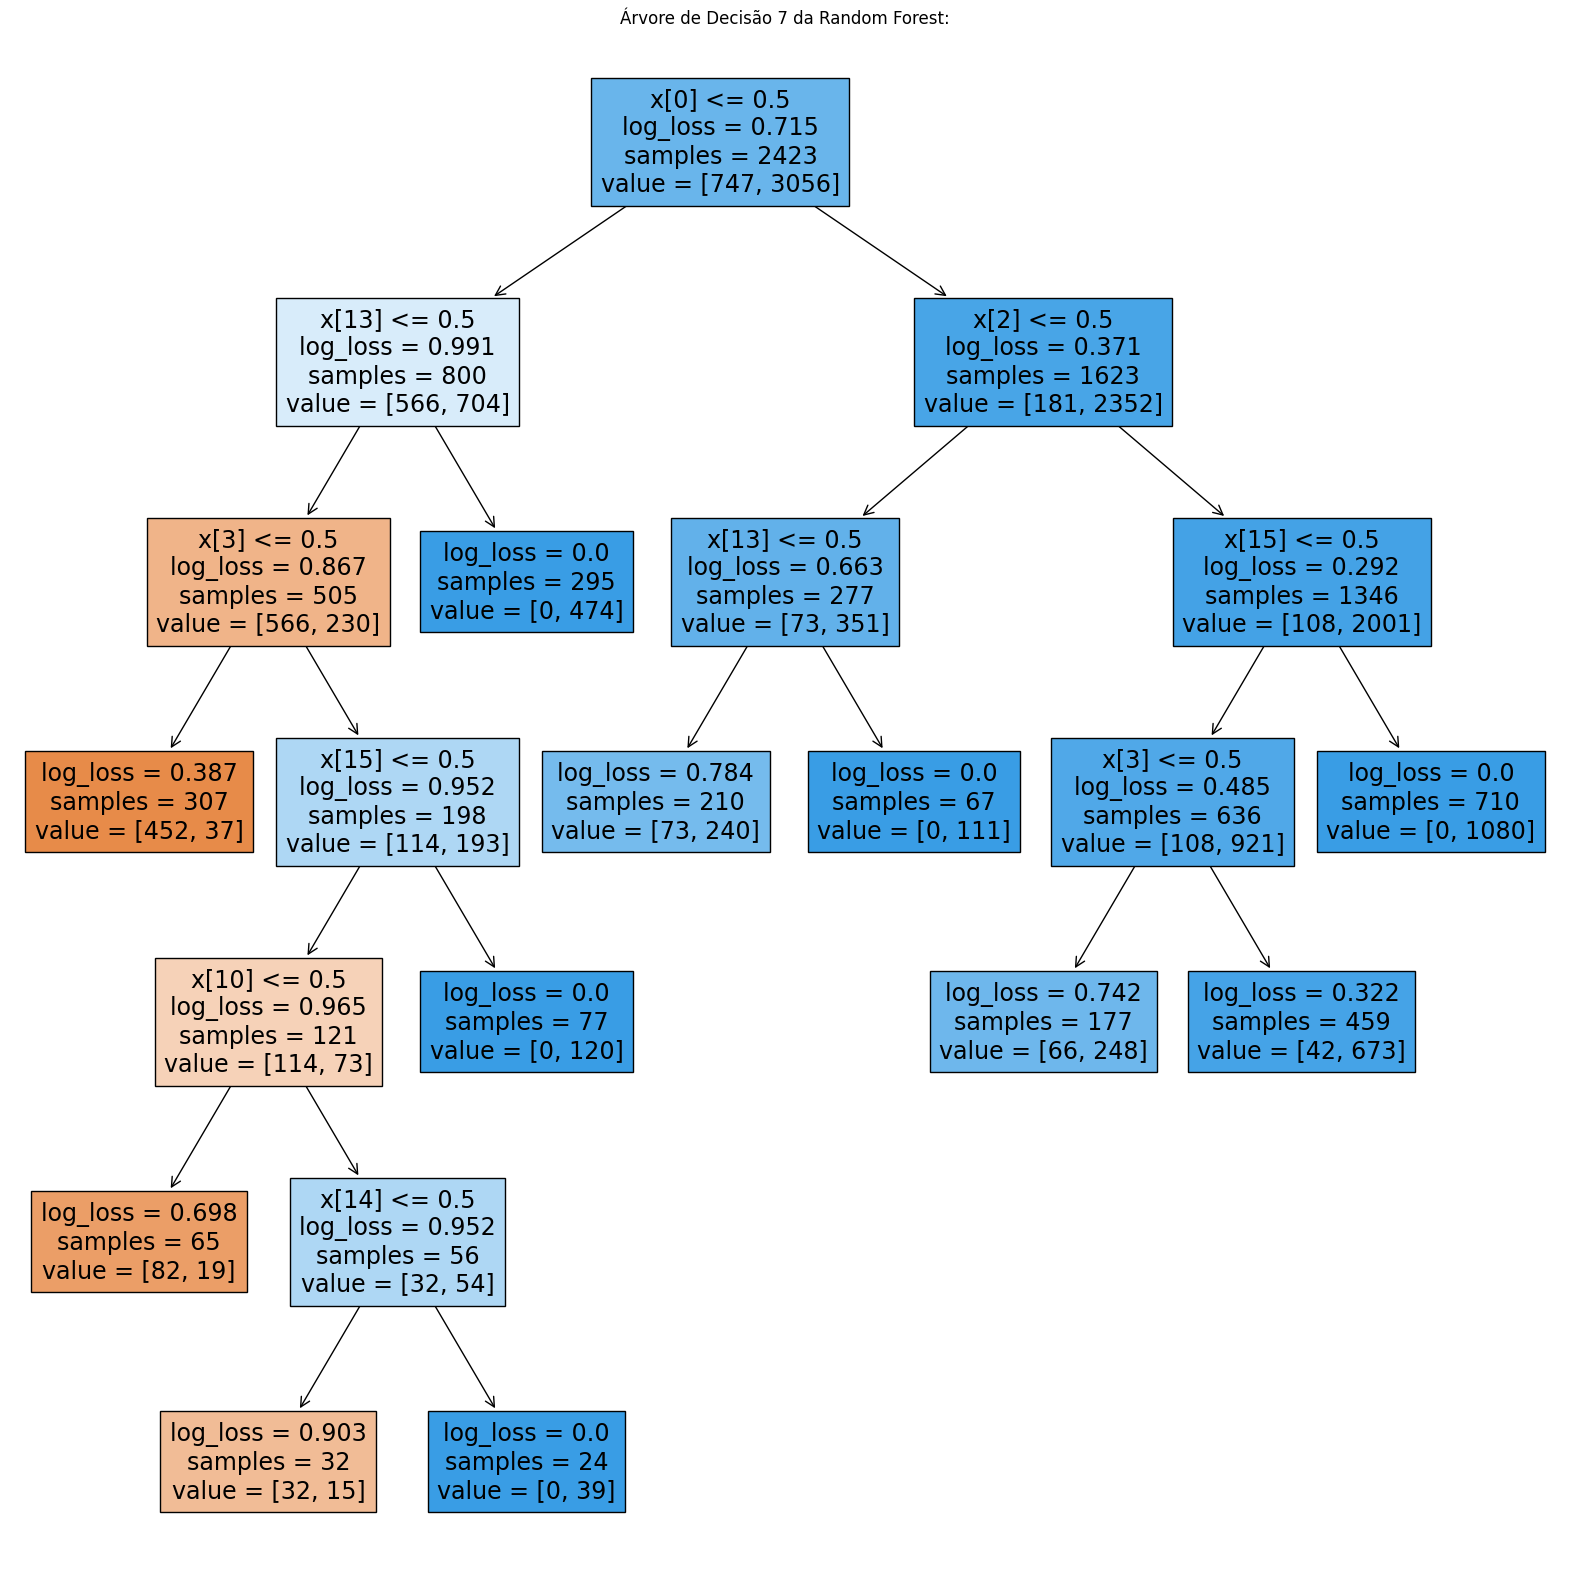

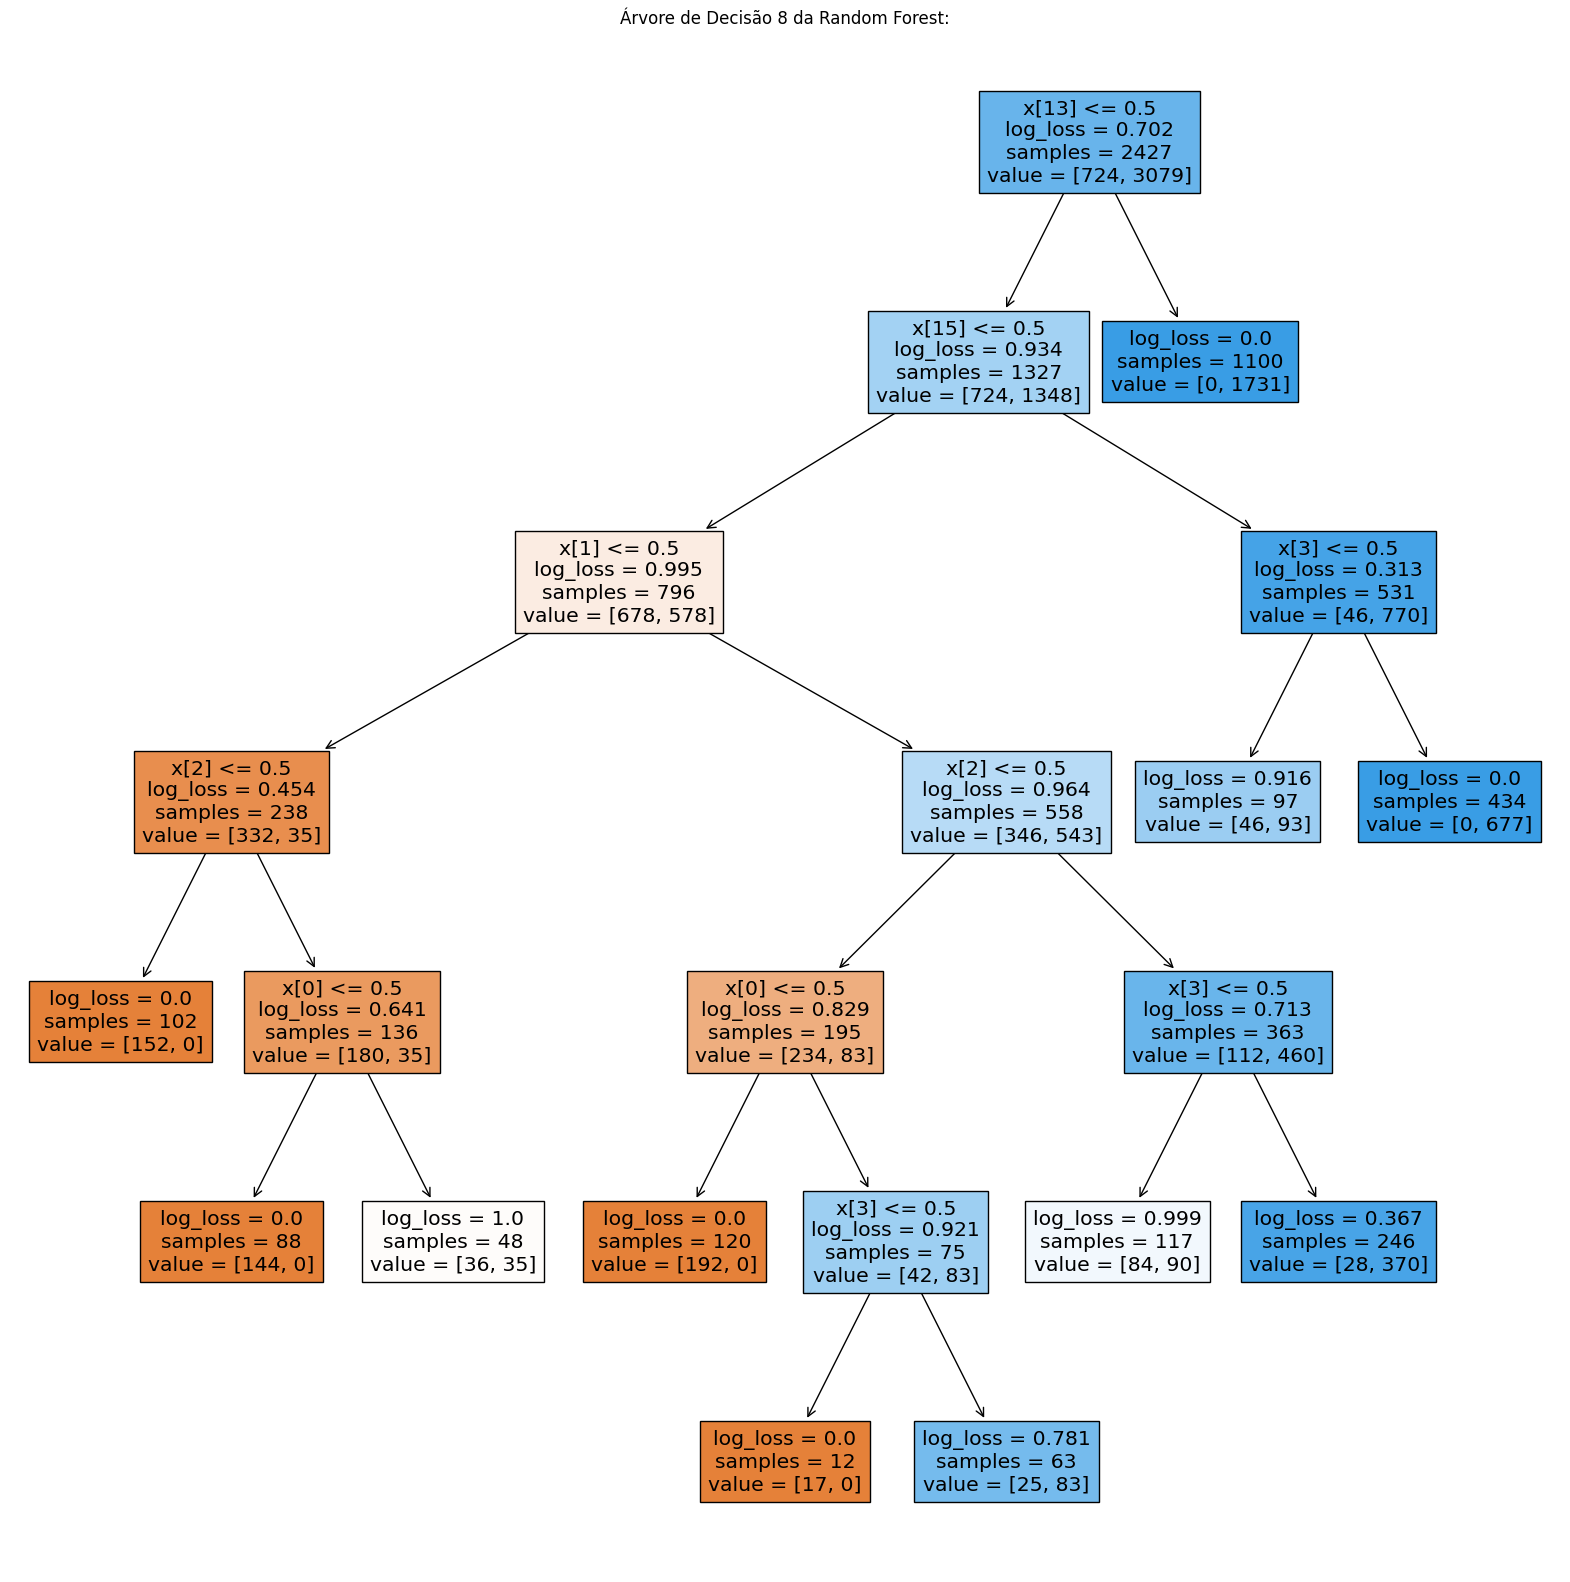

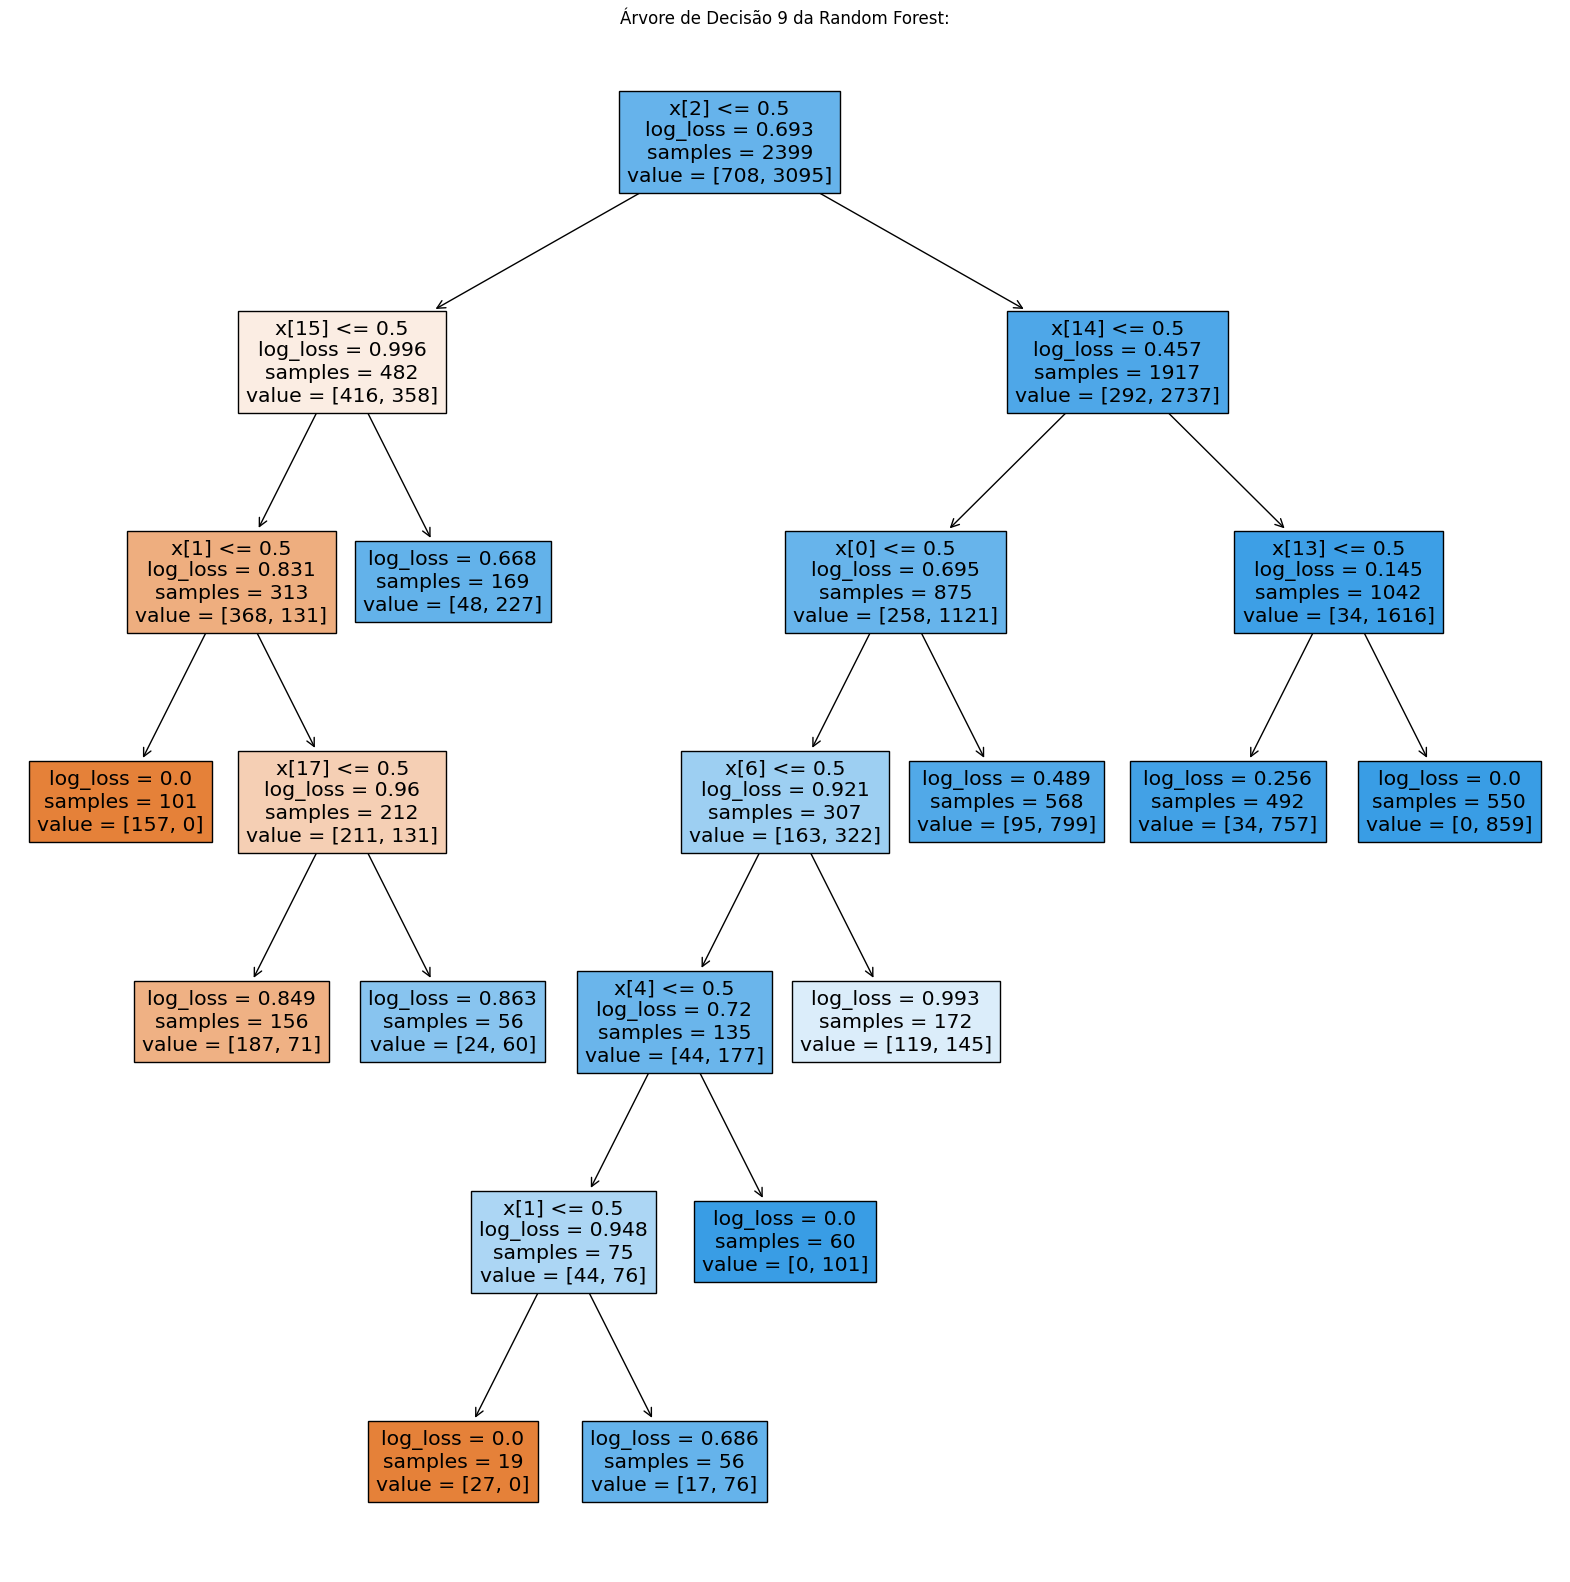

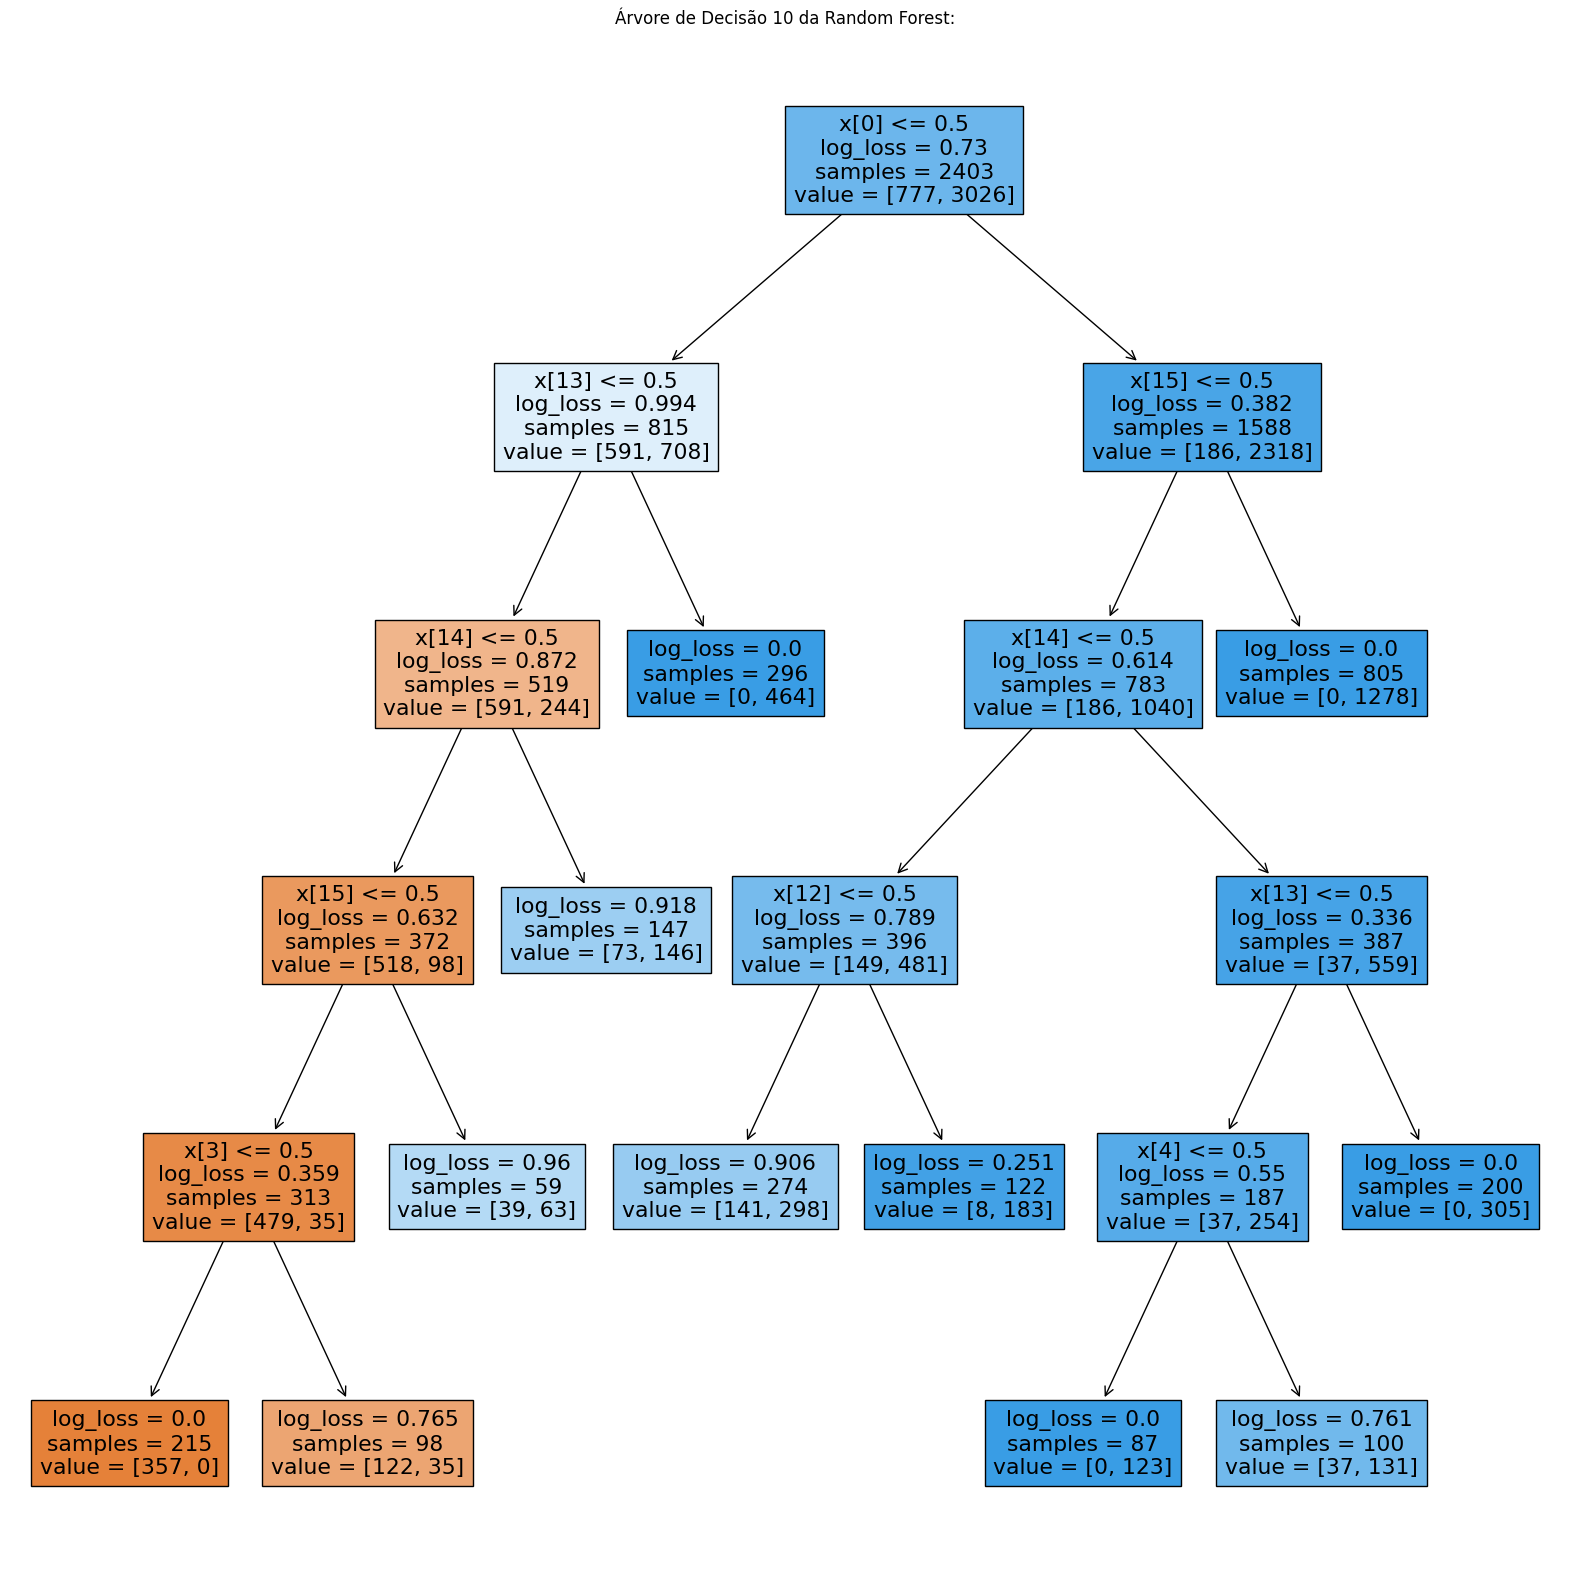

In [13]:
for n, tree in enumerate(best):
    plt.figure(figsize=(20,20))
    plot_tree(tree, filled=True)
    plt.title(f"Árvore de Decisão {n} da Random Forest:")
    plt.show()

In [14]:
print(f"Acurâcia do teste: {accuracy_score(labels_test, labels_pred)}")

Acurâcia do teste: 0.9448191293684856
